In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import baselines.common.plot_util as pu
import scipy

# Choose folders to load

In [2]:
folders_to_load = {
'dqn-predict-variance':['./save/2019-06-08.07:43:25/progress.csv',
       './save/2019-06-08.07:51:19/progress.csv',
       './save/2019-06-08.07:59:22/progress.csv',
       './save/2019-06-08.08:07:16/progress.csv',
       './save/2019-06-08.08:14:44/progress.csv',
       
       
       
      ],
#'dueling':['./save/2019-06-02.00:22:31/progress.csv',
#           './save/2019-06-02.00:25:26/progress.csv',
#           './save/2019-06-02.00:28:26/progress.csv',
#      ]

}
folders_to_load

{'dqn': ['./save/2019-06-08.07:43:25/progress.csv',
  './save/2019-06-08.07:51:19/progress.csv',
  './save/2019-06-08.07:59:22/progress.csv',
  './save/2019-06-08.08:07:16/progress.csv',
  './save/2019-06-08.08:14:44/progress.csv']}

In [3]:
cmap = ['green','darkorange','red','blue','purple','yellow']
assert len(cmap) >= len(folders_to_load)

# Set params

In [4]:
max_timestep = 20000
n_steps_to_resample = 500
steps_resampled = np.linspace(0, max_timestep, n_steps_to_resample, endpoint=True)


# Plot raw data


In [ ]:
# Without average 

In [ ]:
c_idx=-1
plt.figure( figsize=(10,10) )

for group, path_to_logs in folders_to_load.items():
    print('== ',group,' ==')
    c_idx+=1
    
    for idx,path_to_log in enumerate(path_to_logs): 
        
        # Get raw curves
        results=pd.read_csv(path_to_log, sep=',',header=0)
        rewards = results['mean 100 episode reward'].values
        episodes = np.reshape(results['episodes'].values, [-1,1])
        steps = results['steps'].values
        episode_reward = results['episode_reward'].values
        # Resample curves
        steps_resampled = np.linspace(0, max_timestep, n_steps_to_resample, endpoint=True)
        episode_reward_resampled = np.interp(steps_resampled, steps, episode_reward)
        rewards_resampled = np.interp(steps_resampled, steps, rewards)
        # Reshape
        steps = np.reshape(steps,[-1,1])
        steps_resampled = np.reshape(steps_resampled,[-1,1])
        episode_reward = np.reshape(episode_reward,[-1,1])
        episode_reward_resampled = np.reshape(episode_reward_resampled,[-1,1])
        rewards_resampled = np.reshape(rewards_resampled,[-1,1])

        # Plot resampled curves
        if idx==0:
            plt.plot(steps_resampled, rewards_resampled,c=cmap[c_idx],label=group)
        else: 
            plt.plot(steps_resampled, rewards_resampled,c=cmap[c_idx])

plt.xlim((0,max_timestep))
plt.legend()

plt.xlabel('steps')

#plt.ylabel('episode reward')
plt.ylabel('running mean reward over past 100 episode')

plt.show()



In [ ]:
# With average

In [ ]:
c_idx=-1
plt.figure( figsize=(10,10) )

for group, path_to_logs in folders_to_load.items():
    c_idx+=1
    
    episode_reward_resampled_global = None
    rewards_resampled_global = None

    for path_to_log in path_to_logs: 
        
        # Get raw curves
        results=pd.read_csv(path_to_log, sep=',',header=0)
        rewards = results['mean 100 episode reward'].values
        episodes = np.reshape(results['episodes'].values, [-1,1])
        steps = results['steps'].values
        episode_reward = results['episode_reward'].values
        # Resample curves
        steps_resampled = np.linspace(0, max_timestep, n_steps_to_resample, endpoint=True)
        episode_reward_resampled = np.interp(steps_resampled, steps, episode_reward)
        rewards_resampled = np.interp(steps_resampled, steps, rewards)
        # Reshape
        steps = np.reshape(steps,[-1,1])
        steps_resampled = np.reshape(steps_resampled,[-1,1])
        episode_reward = np.reshape(episode_reward,[-1,1])
        episode_reward_resampled = np.reshape(episode_reward_resampled,[-1,1])
        rewards_resampled = np.reshape(rewards_resampled,[-1,1])

        episode_reward_resampled_global = episode_reward_resampled if episode_reward_resampled_global is None else np.concatenate([episode_reward_resampled_global,episode_reward_resampled],axis=1)
        rewards_resampled_global = rewards_resampled if rewards_resampled_global is None else np.concatenate([rewards_resampled_global,rewards_resampled],axis=1)

    # Get mean and std of resampled curves
    r_mean_ep_r = np.mean(episode_reward_resampled_global,axis=1)
    r_std_ep_r = np.std(episode_reward_resampled_global,axis=1)
    r_mean_r = np.mean(rewards_resampled_global,axis=1)
    r_std_r = np.std(rewards_resampled_global,axis=1)
    
    # Plot mean resampled curves
    plt.legend(group)
    #plt.plot(steps_resampled, r_mean_ep_r,c=cmap[c_idx],label=group)
    plt.plot(steps_resampled, r_mean_r,c=cmap[c_idx],label=group)
    
    # Plot std deviation resampled curves
    #plt.fill_between(steps_resampled.flatten(), r_mean_ep_r-r_std_ep_r, r_mean_ep_r+r_std_ep_r, alpha=0.5, edgecolor=cmap[c_idx], facecolor=cmap[c_idx])
    plt.fill_between(steps_resampled.flatten(), r_mean_r-r_std_r, r_mean_r+r_std_r, alpha=0.5, edgecolor=cmap[c_idx], facecolor=cmap[c_idx])

        
plt.xlim((0,max_timestep))
plt.legend()

plt.xlabel('steps')

#plt.ylabel('episode reward')
plt.ylabel('running mean reward over past 100 episode')

plt.show()



# Plot smoothed data


In [6]:
radius=10

In [ ]:
# Without average

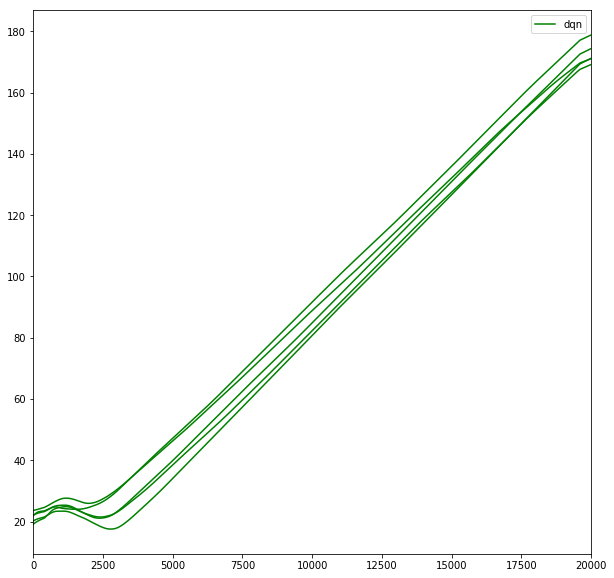

In [8]:
c_idx=-1
plt.figure( figsize=(10,10) )

for group, path_to_logs in folders_to_load.items():
    c_idx+=1
    
    for idx,path_to_log in enumerate(path_to_logs): 
        
        # Get raw curves
        results=pd.read_csv(path_to_log, sep=',',header=0)
        rewards = results['mean 100 episode reward'].values
        episodes = np.reshape(results['episodes'].values, [-1,1])
        steps = results['steps'].values
        episode_reward = results['episode_reward'].values
        # Resample curves
        steps_resampled = np.linspace(0, max_timestep, n_steps_to_resample, endpoint=True)
        episode_reward_resampled = np.interp(steps_resampled, steps, episode_reward)
        rewards_resampled = np.interp(steps_resampled, steps, rewards)
        # Reshape
        steps = np.reshape(steps,[-1,1])
        steps_resampled = np.reshape(steps_resampled,[-1,1])
        episode_reward = np.reshape(episode_reward,[-1,1])
        rewards = np.reshape(rewards,[-1,1])

        # Smooth resampled curves
        episode_reward_resampled_smoothed = pu.smooth(episode_reward_resampled,radius=radius)
        episode_reward_resampled_smoothed = np.reshape(episode_reward_resampled_smoothed,[-1,1])

        rewards_resampled_smoothed = pu.smooth(rewards_resampled,radius=radius)
        rewards_resampled_smoothed = np.reshape(rewards_resampled_smoothed,[-1,1])

        # Plot resampled curves
        if idx==0:
            plt.plot(steps_resampled, rewards_resampled_smoothed,c=cmap[c_idx],label=group)
        else: 
            plt.plot(steps_resampled, rewards_resampled_smoothed,c=cmap[c_idx])
            
plt.xlim((0,max_timestep))
plt.legend()
plt.xlabel('steps')

#plt.ylabel('episode reward')
plt.ylabel('running mean reward over past 100 episode')

plt.show()



In [ ]:
# With average

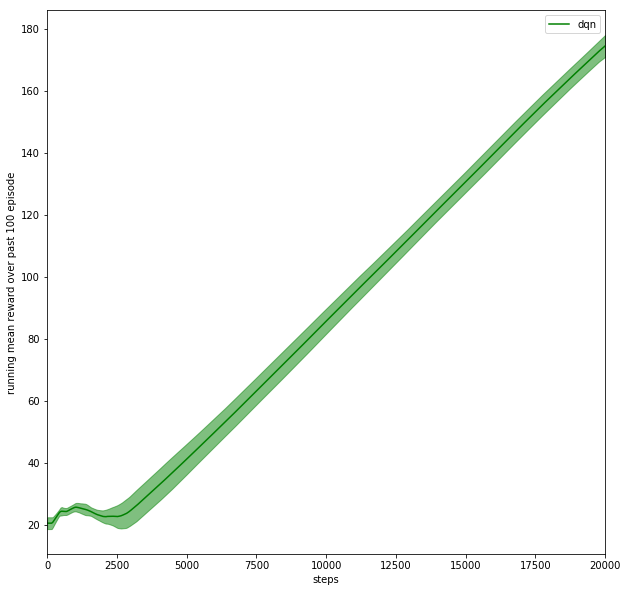

In [9]:
c_idx=-1
plt.figure( figsize=(10,10) )

for group, path_to_logs in folders_to_load.items():
    c_idx+=1
    
    episode_reward_resampled_global = None
    rewards_resampled_global = None

    for path_to_log in path_to_logs: 
        
        # Get raw curves
        results=pd.read_csv(path_to_log, sep=',',header=0)
        rewards = results['mean 100 episode reward'].values
        episodes = np.reshape(results['episodes'].values, [-1,1])
        steps = results['steps'].values
        episode_reward = results['episode_reward'].values
        # Resample curves
        steps_resampled = np.linspace(0, max_timestep, n_steps_to_resample, endpoint=True)
        episode_reward_resampled = np.interp(steps_resampled, steps, episode_reward)
        rewards_resampled = np.interp(steps_resampled, steps, rewards)
        # Reshape
        steps = np.reshape(steps,[-1,1])
        steps_resampled = np.reshape(steps_resampled,[-1,1])
        episode_reward = np.reshape(episode_reward,[-1,1])
        rewards_resampled = np.reshape(rewards_resampled,[-1,1])

        # Smooth resampled curves
        episode_reward_resampled_smoothed = pu.smooth(episode_reward_resampled,radius=radius)
        episode_reward_resampled_smoothed = np.reshape(episode_reward_resampled_smoothed,[-1,1])

        episode_reward_resampled_global = episode_reward_resampled_smoothed if episode_reward_resampled_global is None else np.concatenate([episode_reward_resampled_global,episode_reward_resampled_smoothed],axis=1)
        rewards_resampled_global = rewards_resampled if rewards_resampled_global is None else np.concatenate([rewards_resampled_global,rewards_resampled],axis=1)

    # Get mean and std of resampled curves
    
    r_mean_ep_r = np.mean(episode_reward_resampled_global,axis=1)
    r_std_ep_r = np.std(episode_reward_resampled_global,axis=1)
    r_mean_r = np.mean(rewards_resampled_global,axis=1)
    r_std_r = np.std(rewards_resampled_global,axis=1)
    
    # Plot mean resampled curves
    plt.legend(group)
    #plt.plot(steps_resampled, r_mean_ep_r,c=cmap[c_idx],label=group)
    plt.plot(steps_resampled, r_mean_r,c=cmap[c_idx],label=group)
    
    # Plot std deviation resampled curves
    #plt.fill_between(steps_resampled.flatten(), r_mean_ep_r-r_std_ep_r, r_mean_ep_r+r_std_ep_r, alpha=0.5, edgecolor=cmap[c_idx], facecolor=cmap[c_idx])
    plt.fill_between(steps_resampled.flatten(), r_mean_r-r_std_r, r_mean_r+r_std_r, alpha=0.5, edgecolor=cmap[c_idx], facecolor=cmap[c_idx])

    

        
plt.xlim((0,max_timestep))
plt.legend()
plt.xlabel('steps')

#plt.ylabel('episode reward')
plt.ylabel('running mean reward over past 100 episode')

plt.show()



# TODO: filter out episodes whose length is too long...